Aqui vem o texto de introdução do trabalho​

In [1]:
import pandas as pd

Este arquivo csv corresponde aos dados de algumas Telemetrias do CBERS1 colhidas durante todo o mesmo de janeiro de 2000

In [2]:
rawData = pd.read_csv('rawData/CBERS1/01jan2000_a_31jan2000_vi.csv')
rawData

,OBTIME,TMD001,TMD002,TMD003,TMD004,TMD005,TMD006,TMD007,TMD008,TMD009,...,TMD106,TMD107,TMD108,TMD109,TMD110,TMD111,TMD112,TMD113,TMD114,TMD115
0,01-01-2000 03:04:29.856,28.2,18.8,13.00,0,0,1,0,1,1,...,NaN,0,0.0,0.0,0.0,0,0.0,0,0.0,0
1,01-01-2000 03:05:22.289,28.1,18.1,13.20,0,0,1,0,1,1,...,NaN,0,0.0,0.0,0.0,0,0.0,0,0.0,0
2,01-01-2000 03:06:14.723,28.1,18.3,13.00,0,0,1,0,1,1,...,NaN,0,0.0,0.0,0.0,0,0.0,0,0.0,0
3,01-01-2000 12:22:38.359,28.1,12.4,13.10,1,1,0,0,0,0,...,NaN,0,0.0,0.0,0.0,0,0.0,0,0.0,0
4,01-01-2000 12:23:30.792,28.1,13.1,18.50,0,0,1,0,1,1,...,NaN,0,0.0,0.0,0.0,0,0.0,0,0.0,0
5,01-01-2000 12:24:23.226,28.1,13.1,18.30,0,0,1,0,1,1,...,NaN,0,0.0,0.0,0.0,0,0.0,0,NaN,0
6,01-01-2000 12:26:04.815,28.1,13.1,18.30,0,0,1,0,1,1,...,NaN,0,0.0,0.0,0.0,0,0.0,0,NaN,0
7,01-01-2000 13:56:48.049,28.1,26.7,18.30,0,0,1,0,1,1,...,0.0,0,0.0,0.0,0.0,0,0.0,0,NaN,0
8,01-01-2000 13:57:40.482,28.1,26.6,15.20,0,0,1,0,1,1,...,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0
9,01-01-2000 13:58:32.916,28.1,26.7,15.20,0,0,1,0,1,1,...,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0


A posteriori: Entender porque o Excel separa os dados por ; ao inves de , quando é selecionado a opção de salvar no modo CSV.
Pois, este pequeno detalhe impede que a função read_csv do Pandas consiga gerar um DF(DataFrame) de um CSV.

In [3]:
import matplotlib as mpl
mpl.__version__
import matplotlib.pyplot as plt

Nesse experimento foram utilizadas apenas telemetrias analógicas que indicavam medidas de interesse do subsistema de suprimento de energia, especialmente as telemetrias associadas às baterias, ao painel solar, aos equipamentos SHUNT e BDR. Essas telemetrias foram escolhidas por serem as mais representativas do comportamento do subsistema de potência e assim terem maior potencial para identificar problemas e anomalias. A tabela 1 lista as telemetrias que foram utilizadas no experimento.

<table style="width: 50%; margin: 0; padding: 0; border: 0;">
    <caption>Tabela 1 - Telemetrias do Subsistema de Potência</caption>
    <tr>
        <th style="text-align: center; border: 1px solid black">Telemetria</th>
        <th style="text-align: center; border: 1px solid black">Descrição</th>
        <th style="text-align: center; border: 1px solid black">Limites</th>
    </tr>
    <tr>
        <td style="text-align: center; border: 1px solid black">TM001</td>
        <td style="text-align: center; border: 1px solid black">Tensão do Barramento Principal.</td>
        <td style="text-align: center; border: 1px solid black">27 a 29V</td>
    </tr>
    <tr>
        <td style="text-align: center; border: 1px solid black">TM002</td>
        <td style="text-align: center; border: 1px solid black">Corrente do Barramento Principal.</td>
        <td style="text-align: center; border: 1px solid black">0 a 36A</td>
    </tr>
    <tr>
        <td style="text-align: center; border: 1px solid black">TM003</td>
        <td style="text-align: center; border: 1px solid black">Tensão de saída do Main Error Amplifier(MEAS)</td>
        <td style="text-align: center; border: 1px solid black">8 a 23.5V</td>
    </tr>
     <tr>
        <td style="text-align: center; border: 1px solid black">TM013/017</td>
        <td style="text-align: center; border: 1px solid black">Corrente de entrada do BDR</td>
        <td style="text-align: center; border: 1px solid black">0 a 13A</td>
    </tr>
     <tr>
        <td style="text-align: center; border: 1px solid black">TM014/018</td>
        <td style="text-align: center; border: 1px solid black">Tensão das baterias</td>
        <td style="text-align: center; border: 1px solid black">43.2 a 56.5V</td>
    </tr>
     <tr>
        <td style="text-align: center; border: 1px solid black">TM015/019</td>
        <td style="text-align: center; border: 1px solid black">Temperatura das baterias</td>
        <td style="text-align: center; border: 1px solid black">0 a 10°C</td>
    </tr>
     <tr>
        <td style="text-align: center; border: 1px solid black">TM016/020</td>
        <td style="text-align: center; border: 1px solid black">Tensão mínima de grupo de 3 células</td>
        <td style="text-align: center; border: 1px solid black">3.6 a 4.65V</td>
    </tr>
     <tr>
        <td style="text-align: center; border: 1px solid black">TM021</td>
        <td style="text-align: center; border: 1px solid black">Corrente de saída do BDR</td>
        <td style="text-align: center; border: 1px solid black">0 a 36A</td>
    </tr>
     <tr>
        <td style="text-align: center; border: 1px solid black">TM022/023</td>
        <td style="text-align: center; border: 1px solid black">Corrente dos painéis solares (SG1 e SG2)</td>
        <td style="text-align: center; border: 1px solid black">0 a 7.2A</td>
    </tr>
</table>

In [4]:
rawData = rawData[ ["OBTIME", "TMD001", "TMD002", "TMD003", "TMD013", "TMD014", "TMD015", "TMD016", "TMD017", "TMD018", "TMD019", "TMD020", "TMD021", "TMD022", "TMD023"] ]
rawData

,OBTIME,TMD001,TMD002,TMD003,TMD013,TMD014,TMD015,TMD016,TMD017,TMD018,TMD019,TMD020,TMD021,TMD022,TMD023
0,01-01-2000 03:04:29.856,28.2,18.8,13.00,6.500,48.2,1.64,4.07,7.310,47.6,2.42,4.05,-0.373,0.0805,8.280
1,01-01-2000 03:05:22.289,28.1,18.1,13.20,6.500,48.0,1.64,4.05,7.570,47.5,2.42,4.03,20.800,0.0805,0.211
2,01-01-2000 03:06:14.723,28.1,18.3,13.00,6.500,47.9,1.75,4.05,7.400,47.3,2.42,4.01,21.000,0.1130,0.211
3,01-01-2000 12:22:38.359,28.1,12.4,13.10,6.500,47.9,1.75,4.05,7.400,47.3,2.42,4.01,20.600,0.1130,0.211
4,01-01-2000 12:23:30.792,28.1,13.1,18.50,0.326,51.5,1.53,4.41,0.375,52.4,2.20,4.36,-0.183,0.1130,6.110
5,01-01-2000 12:24:23.226,28.1,13.1,18.30,0.326,51.6,1.53,4.33,0.462,52.1,2.20,4.40,-0.183,0.0805,0.146
6,01-01-2000 12:26:04.815,28.1,13.1,18.30,1.030,51.9,1.53,4.35,0.462,51.5,2.20,4.38,-0.373,0.0805,0.146
7,01-01-2000 13:56:48.049,28.1,26.7,18.30,0.326,52.4,1.41,4.37,0.375,51.5,2.20,4.36,2.670,0.0805,6.180
8,01-01-2000 13:57:40.482,28.1,26.6,15.20,2.530,51.7,1.75,4.39,3.010,51.8,2.54,4.38,8.390,6.2800,6.180
9,01-01-2000 13:58:32.916,28.1,26.7,15.20,2.350,51.3,1.75,4.39,3.010,51.9,2.42,4.40,8.770,6.2800,6.140


Nesse momento, que já se sabe o conjunto de dados interessantes para o estudo de caso, é possivel levantar algumas perguntas, como:

Como essas telemtrias evoluem ao longo do tempo?

Os valores tendem a algum comportamento padrão?

Existem outliers ou valores anomalos?

É possivel atraves da analise do comportamento ou tendencia das telemetrias, inferir de maneira aproximada o contexto do satélite?

É possível inferir alguma correlação entre as Telemetrias?

Os dados apresentados na coluna 1, OBTIME, que representam a data e hora que o dado foi adquirido está com data e hora, e seria interessante que esses dados separados para que pudesse ser feito o uso de um dos dois como escala temporal.

In [6]:
df = rawData
df[['Date','Time']] = df.OBTIME.str.split(expand=True)
df

,OBTIME,TMD001,TMD002,TMD003,TMD013,TMD014,TMD015,TMD016,TMD017,TMD018,TMD019,TMD020,TMD021,TMD022,TMD023,Date,Time
0,01-01-2000 03:04:29.856,28.2,18.8,13.00,6.500,48.2,1.64,4.07,7.310,47.6,2.42,4.05,-0.373,0.0805,8.280,01-01-2000,03:04:29.856
1,01-01-2000 03:05:22.289,28.1,18.1,13.20,6.500,48.0,1.64,4.05,7.570,47.5,2.42,4.03,20.800,0.0805,0.211,01-01-2000,03:05:22.289
2,01-01-2000 03:06:14.723,28.1,18.3,13.00,6.500,47.9,1.75,4.05,7.400,47.3,2.42,4.01,21.000,0.1130,0.211,01-01-2000,03:06:14.723
3,01-01-2000 12:22:38.359,28.1,12.4,13.10,6.500,47.9,1.75,4.05,7.400,47.3,2.42,4.01,20.600,0.1130,0.211,01-01-2000,12:22:38.359
4,01-01-2000 12:23:30.792,28.1,13.1,18.50,0.326,51.5,1.53,4.41,0.375,52.4,2.20,4.36,-0.183,0.1130,6.110,01-01-2000,12:23:30.792
5,01-01-2000 12:24:23.226,28.1,13.1,18.30,0.326,51.6,1.53,4.33,0.462,52.1,2.20,4.40,-0.183,0.0805,0.146,01-01-2000,12:24:23.226
6,01-01-2000 12:26:04.815,28.1,13.1,18.30,1.030,51.9,1.53,4.35,0.462,51.5,2.20,4.38,-0.373,0.0805,0.146,01-01-2000,12:26:04.815
7,01-01-2000 13:56:48.049,28.1,26.7,18.30,0.326,52.4,1.41,4.37,0.375,51.5,2.20,4.36,2.670,0.0805,6.180,01-01-2000,13:56:48.049
8,01-01-2000 13:57:40.482,28.1,26.6,15.20,2.530,51.7,1.75,4.39,3.010,51.8,2.54,4.38,8.390,6.2800,6.180,01-01-2000,13:57:40.482
9,01-01-2000 13:58:32.916,28.1,26.7,15.20,2.350,51.3,1.75,4.39,3.010,51.9,2.42,4.40,8.770,6.2800,6.140,01-01-2000,13:58:32.916


In [7]:
    df.drop(columns=['OBTIME'])

,TMD001,TMD002,TMD003,TMD013,TMD014,TMD015,TMD016,TMD017,TMD018,TMD019,TMD020,TMD021,TMD022,TMD023,Date,Time
0,28.2,18.8,13.00,6.500,48.2,1.64,4.07,7.310,47.6,2.42,4.05,-0.373,0.0805,8.280,01-01-2000,03:04:29.856
1,28.1,18.1,13.20,6.500,48.0,1.64,4.05,7.570,47.5,2.42,4.03,20.800,0.0805,0.211,01-01-2000,03:05:22.289
2,28.1,18.3,13.00,6.500,47.9,1.75,4.05,7.400,47.3,2.42,4.01,21.000,0.1130,0.211,01-01-2000,03:06:14.723
3,28.1,12.4,13.10,6.500,47.9,1.75,4.05,7.400,47.3,2.42,4.01,20.600,0.1130,0.211,01-01-2000,12:22:38.359
4,28.1,13.1,18.50,0.326,51.5,1.53,4.41,0.375,52.4,2.20,4.36,-0.183,0.1130,6.110,01-01-2000,12:23:30.792
5,28.1,13.1,18.30,0.326,51.6,1.53,4.33,0.462,52.1,2.20,4.40,-0.183,0.0805,0.146,01-01-2000,12:24:23.226
6,28.1,13.1,18.30,1.030,51.9,1.53,4.35,0.462,51.5,2.20,4.38,-0.373,0.0805,0.146,01-01-2000,12:26:04.815
7,28.1,26.7,18.30,0.326,52.4,1.41,4.37,0.375,51.5,2.20,4.36,2.670,0.0805,6.180,01-01-2000,13:56:48.049
8,28.1,26.6,15.20,2.530,51.7,1.75,4.39,3.010,51.8,2.54,4.38,8.390,6.2800,6.180,01-01-2000,13:57:40.482
9,28.1,26.7,15.20,2.350,51.3,1.75,4.39,3.010,51.9,2.42,4.40,8.770,6.2800,6.140,01-01-2000,13:58:32.916


In [8]:
df = df[ ["Date","Time", "TMD001", "TMD002", "TMD003", "TMD013", "TMD014", "TMD015", "TMD016", "TMD017", "TMD018", "TMD019", "TMD020", "TMD021", "TMD022", "TMD023"] ]
df

,Date,Time,TMD001,TMD002,TMD003,TMD013,TMD014,TMD015,TMD016,TMD017,TMD018,TMD019,TMD020,TMD021,TMD022,TMD023
0,01-01-2000,03:04:29.856,28.2,18.8,13.00,6.500,48.2,1.64,4.07,7.310,47.6,2.42,4.05,-0.373,0.0805,8.280
1,01-01-2000,03:05:22.289,28.1,18.1,13.20,6.500,48.0,1.64,4.05,7.570,47.5,2.42,4.03,20.800,0.0805,0.211
2,01-01-2000,03:06:14.723,28.1,18.3,13.00,6.500,47.9,1.75,4.05,7.400,47.3,2.42,4.01,21.000,0.1130,0.211
3,01-01-2000,12:22:38.359,28.1,12.4,13.10,6.500,47.9,1.75,4.05,7.400,47.3,2.42,4.01,20.600,0.1130,0.211
4,01-01-2000,12:23:30.792,28.1,13.1,18.50,0.326,51.5,1.53,4.41,0.375,52.4,2.20,4.36,-0.183,0.1130,6.110
5,01-01-2000,12:24:23.226,28.1,13.1,18.30,0.326,51.6,1.53,4.33,0.462,52.1,2.20,4.40,-0.183,0.0805,0.146
6,01-01-2000,12:26:04.815,28.1,13.1,18.30,1.030,51.9,1.53,4.35,0.462,51.5,2.20,4.38,-0.373,0.0805,0.146
7,01-01-2000,13:56:48.049,28.1,26.7,18.30,0.326,52.4,1.41,4.37,0.375,51.5,2.20,4.36,2.670,0.0805,6.180
8,01-01-2000,13:57:40.482,28.1,26.6,15.20,2.530,51.7,1.75,4.39,3.010,51.8,2.54,4.38,8.390,6.2800,6.180
9,01-01-2000,13:58:32.916,28.1,26.7,15.20,2.350,51.3,1.75,4.39,3.010,51.9,2.42,4.40,8.770,6.2800,6.140


In [9]:
import seaborn as sns

In [17]:
rawData = rawData.drop(columns=['OBTIME','Date','Time'])


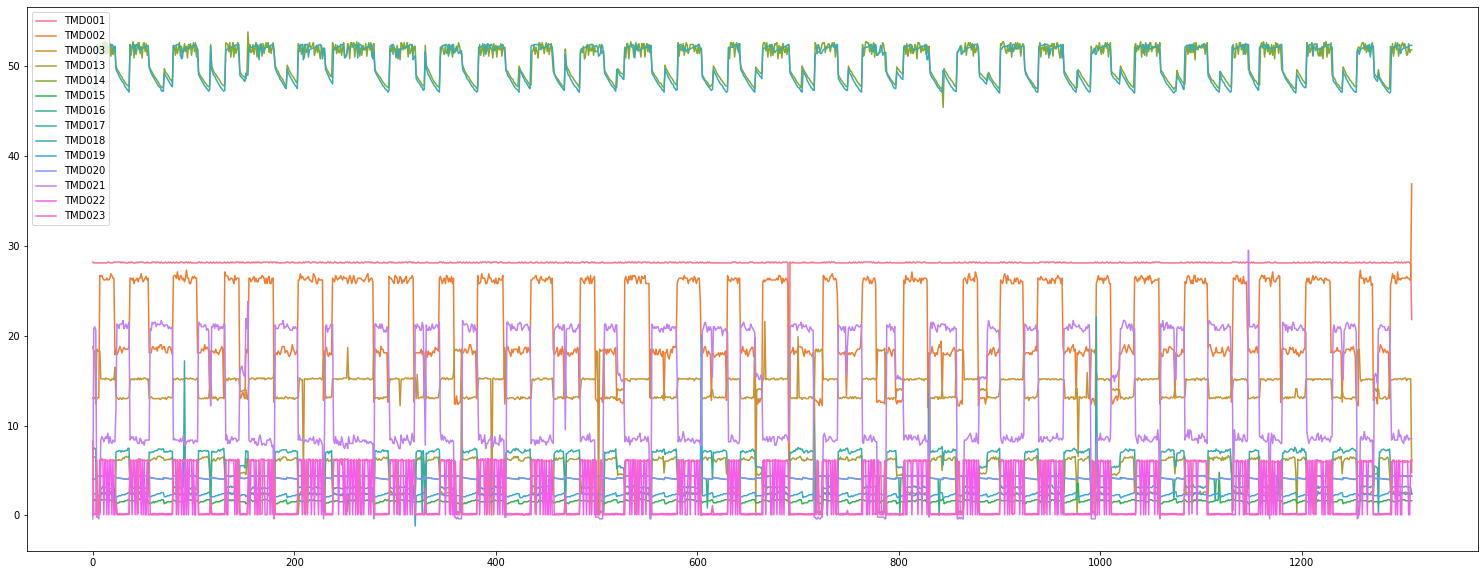

In [21]:
plt.figure(figsize=(26, 10))
sns.lineplot(data=rawData, dashes=False)

Nesse primeiro momento é possivel identificar o comportamento ciclico das telemetrias que podem ser relacionadas aos momentos de eclipse e visada do sol. Também é possivel identificar alguns picos em alguns sinais mas que devido a janela de tempo, muito extesa, torna-se dificil a vizualização. Afim de contornar este problema, será feito um plot com janela temporal menor. 

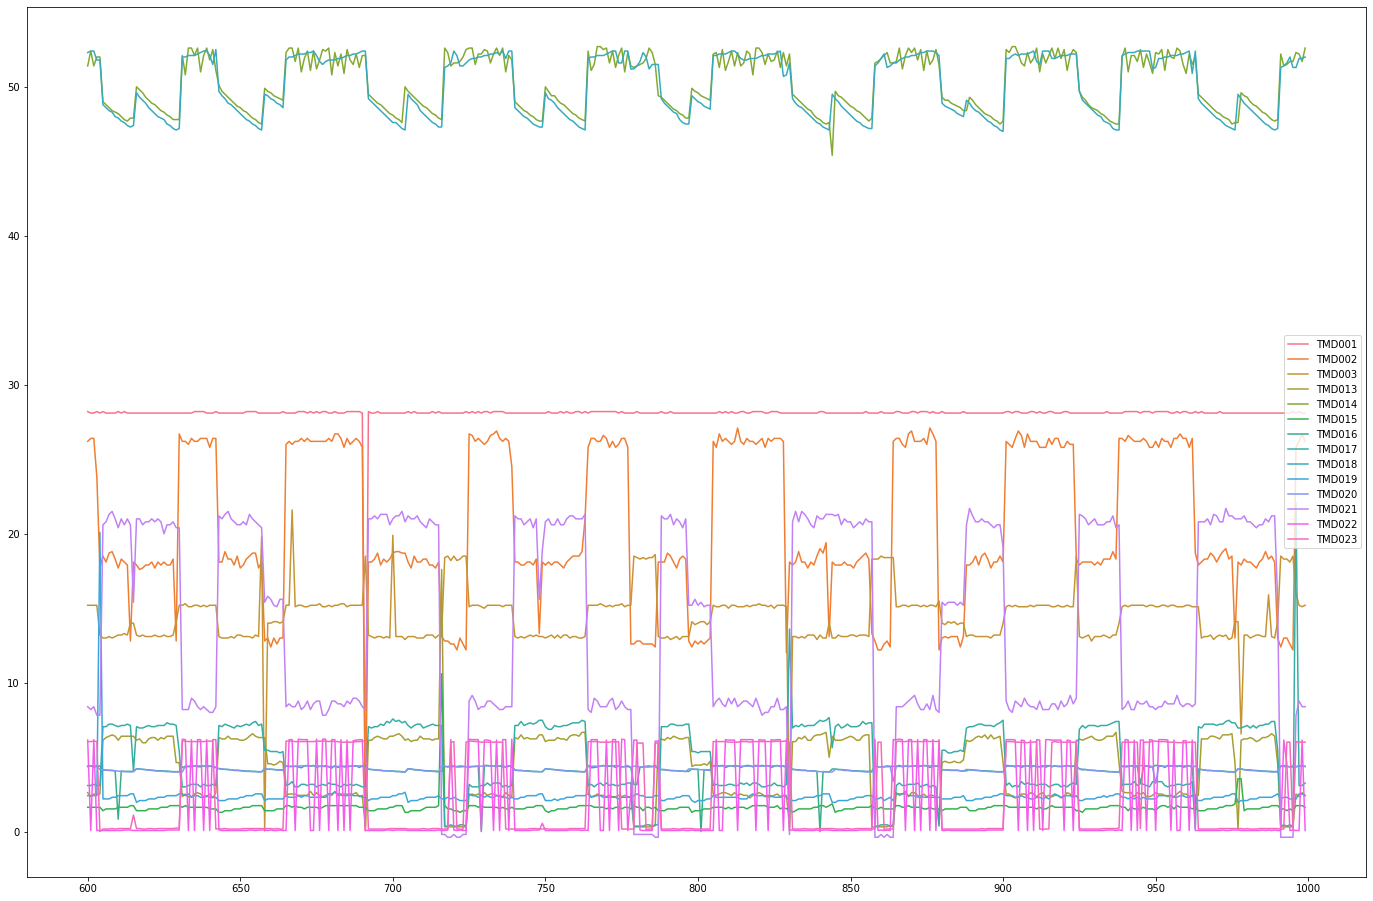

In [36]:
plt.figure(figsize=(24, 16))
sns.lineplot(data=rawData[600:1000], dashes=False)

Ainda com uma janela de tempo reduzida, devido a sobreposição dos sinais, fica dificil a analise do comportamento. Num primeiro momento, é possivel infeir que as telemetrias TMD0014 e TMD0018, relativas as tesões da bateria estão se comportando de maneira esperada. O que pode ser confimado com o boxsplot abaixo

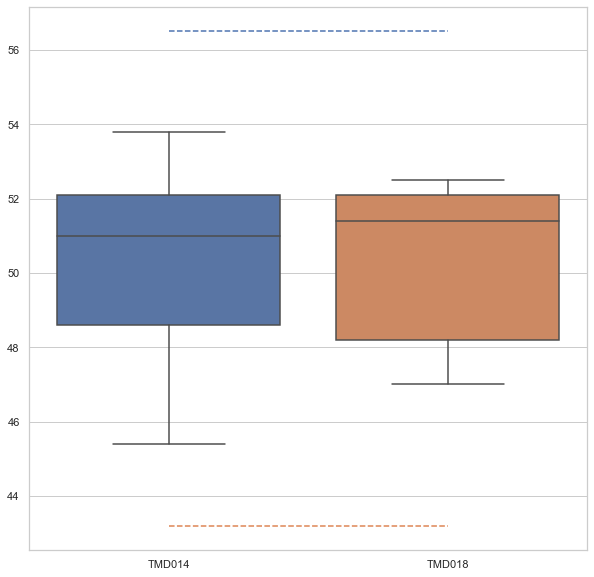

In [133]:
plt.figure(figsize=(10, 10))
sns.set(style="whitegrid")
sns.boxplot(data=rawData, order = ['TMD014','TMD018'])
plt.plot([0, 1], [56.5, 56.5],  ls='--')
plt.plot([0, 1], [43.2, 43.2],  ls='--')


No grafico acima, a linha azul tracejada indica o valor maximo permitido para tensão das baterias, e de maneira analoga, a linha laranja tracejada, o valor minimo permitido. Embora o valor de tensão destas tenha sido levemente diferente durante a janela de tempo analizada, é posivel afiram que estas podem ser excluidas de analise posteriores.


Abaixo foi feito o plot dos sinais de maneira separada afim de evitar a sobreposição destes. Os sinais foram oganização confome listados na tabela 1.

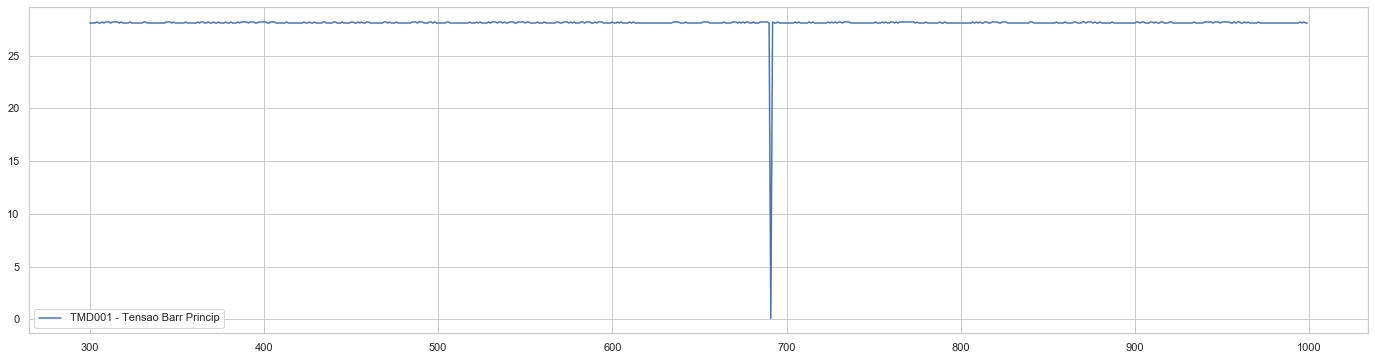

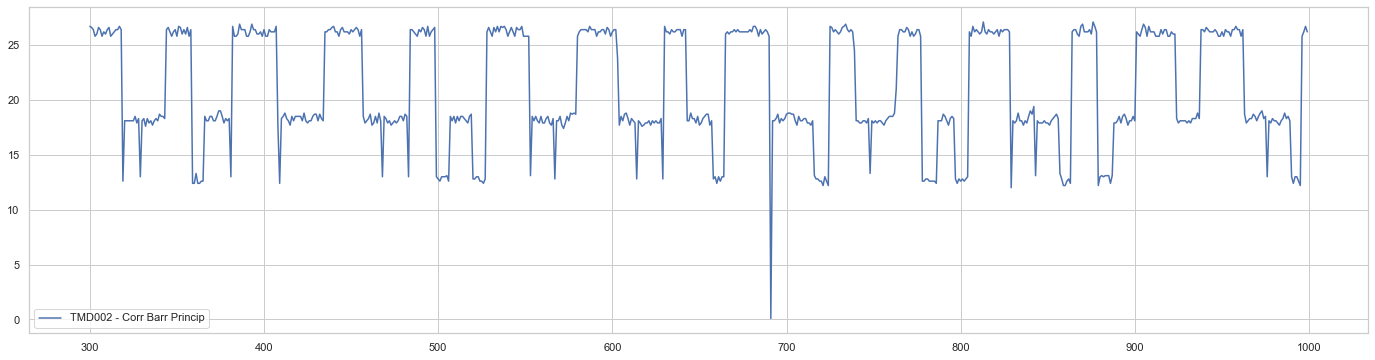

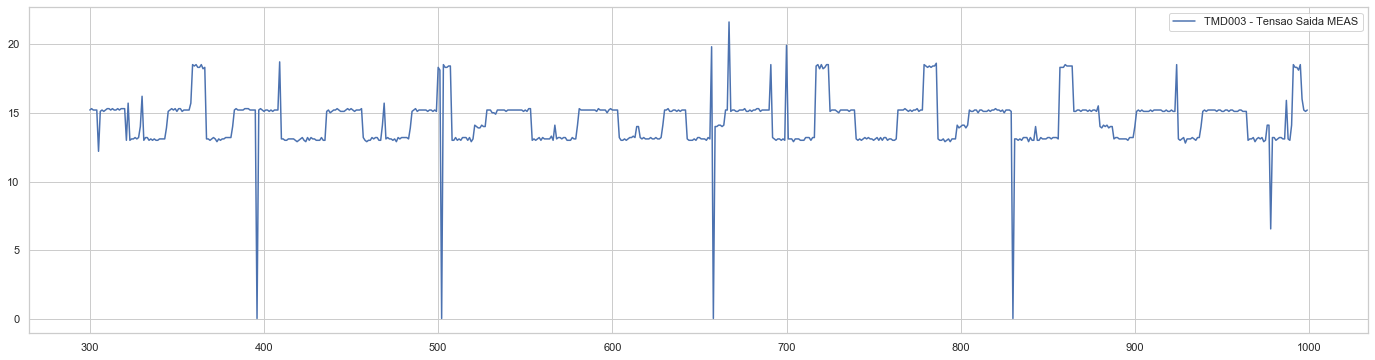

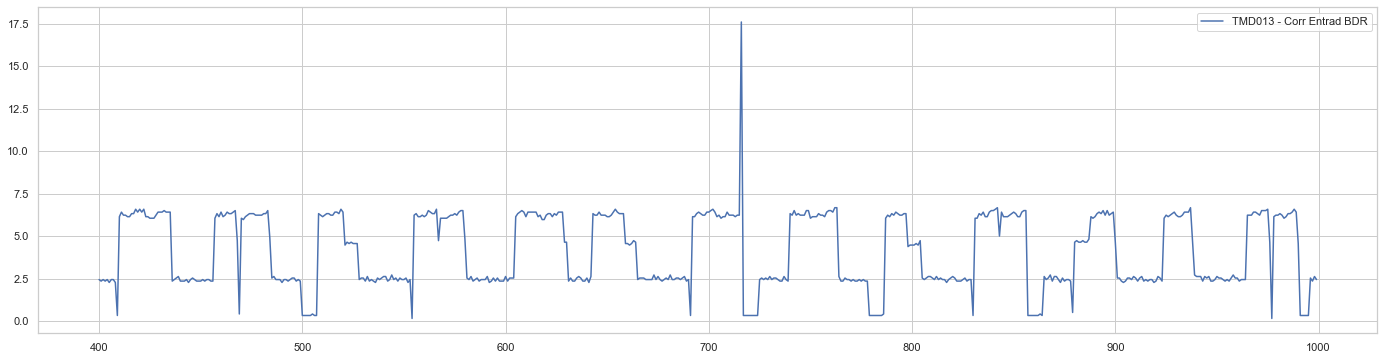

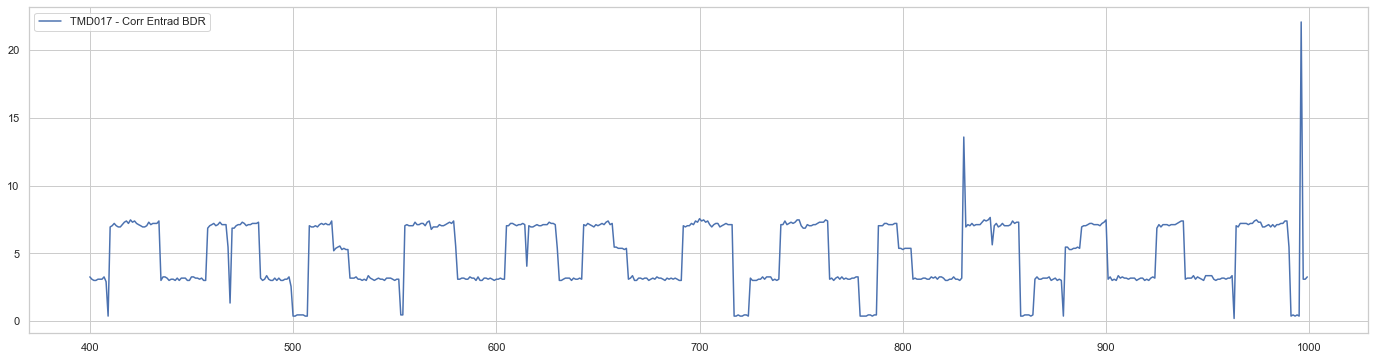

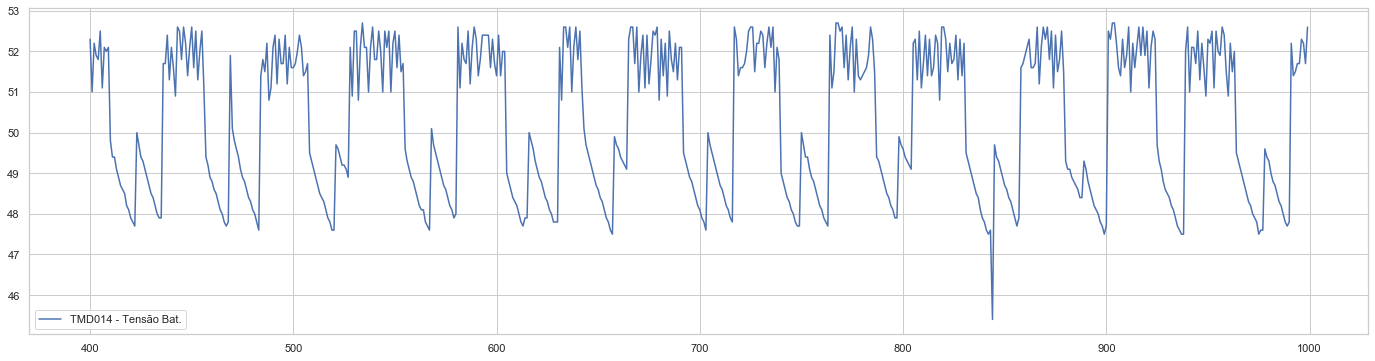

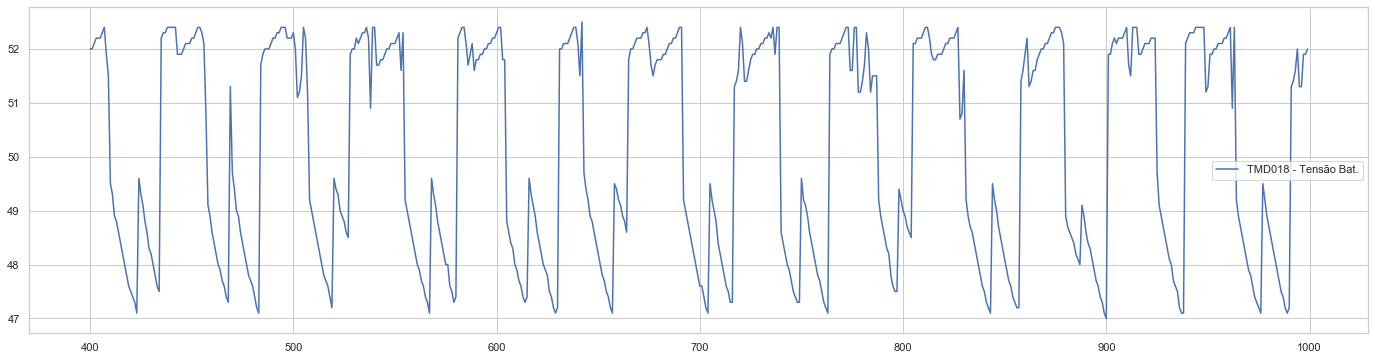

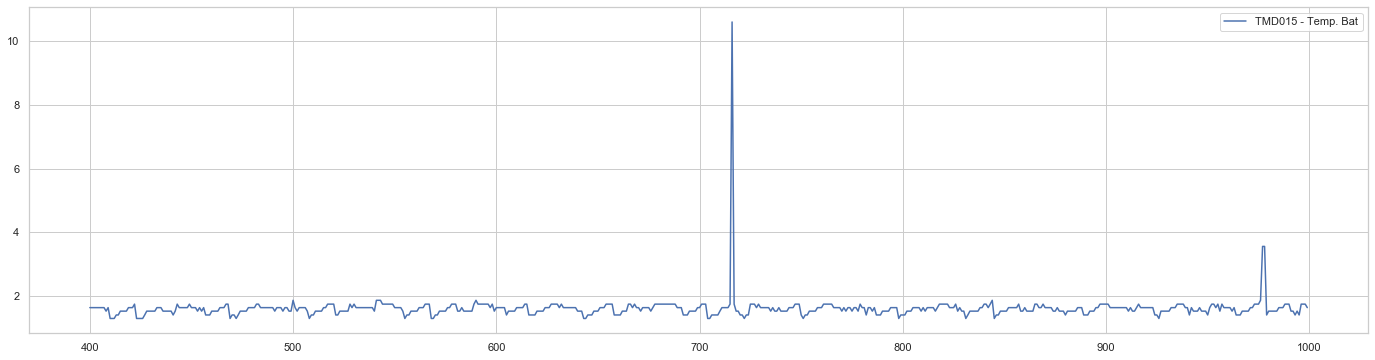

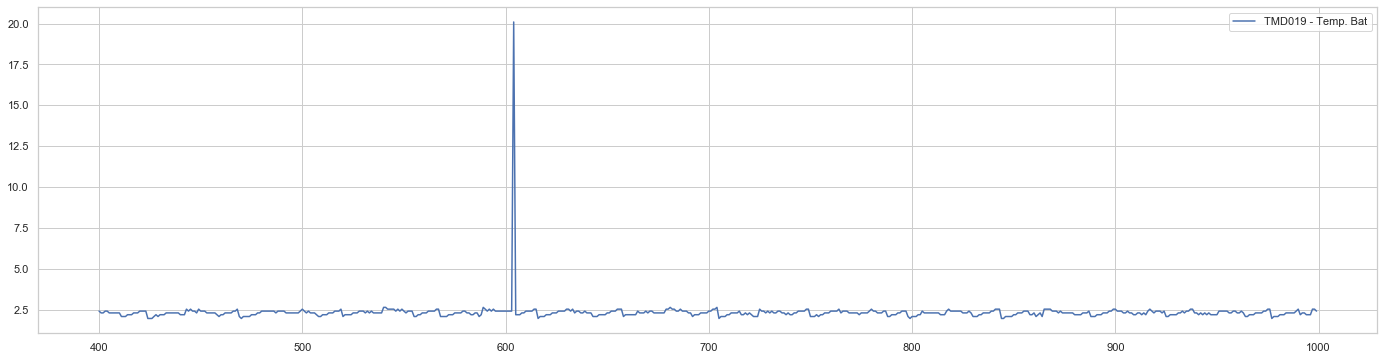

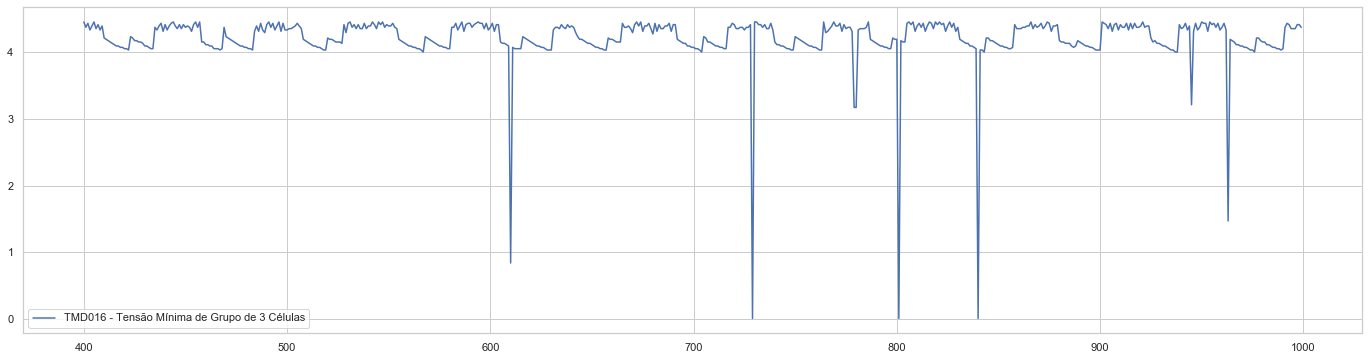

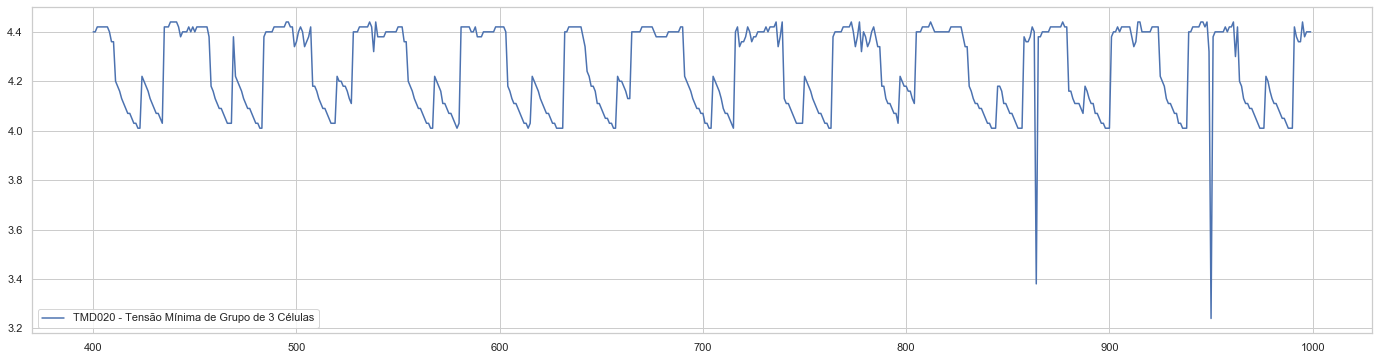

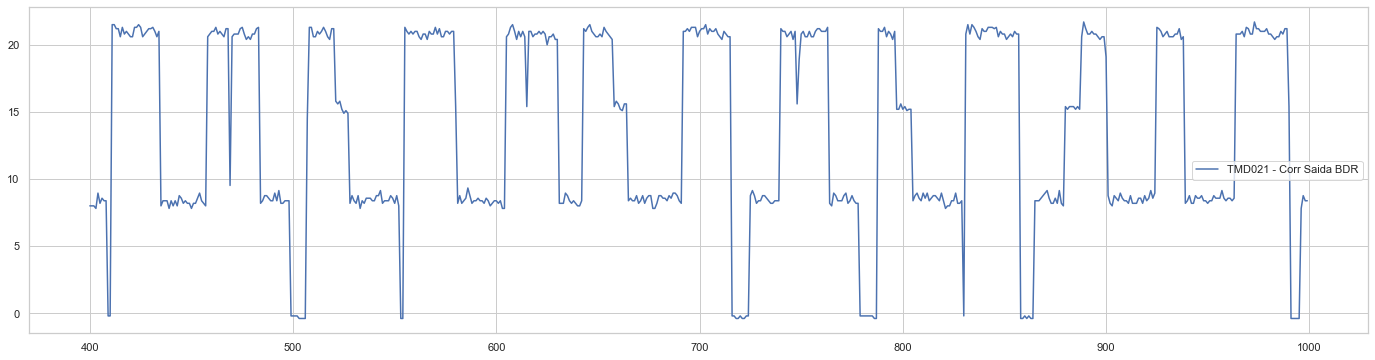

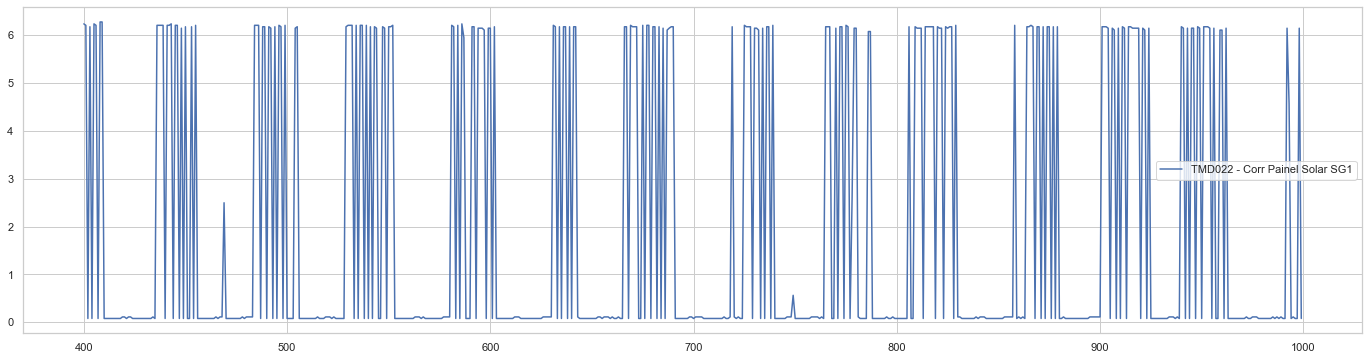

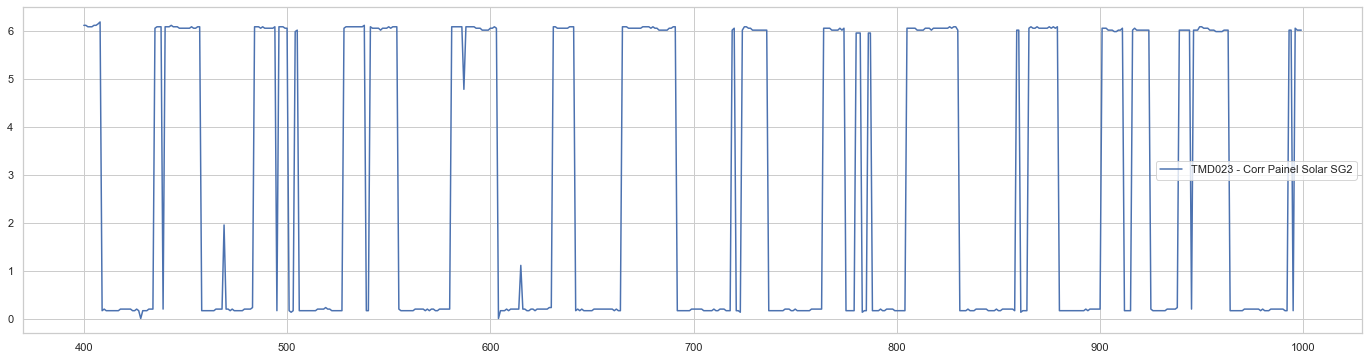

In [163]:
plt.figure(figsize=(24, 6))
sns.lineplot(data=rawData[ 300:1000:1]["TMD001"], dashes=False, label = "TMD001 - Tensao Barr Princip")
plt.figure(figsize=(24, 6))
sns.lineplot(data=rawData[ 300:1000:1]["TMD002"], dashes=False, label = "TMD002 - Corr Barr Princip")
plt.figure(figsize=(24, 6))
sns.lineplot(data=rawData[ 300:1000:1]["TMD003"], dashes=False, label = "TMD003 - Tensao Saida MEAS")
plt.figure(figsize=(24, 6))
sns.lineplot(data=rawData[ 400:1000:1]["TMD013"], dashes=False, label = "TMD013 - Corr Entrad BDR")
plt.figure(figsize=(24, 6))
sns.lineplot(data=rawData[ 400:1000:1]["TMD017"], dashes=False, label = "TMD017 - Corr Entrad BDR")
plt.figure(figsize=(24, 6))
sns.lineplot(data=rawData[ 400:1000:1]["TMD014"], dashes=False, label = "TMD014 - Tensão Bat.")
plt.figure(figsize=(24, 6))
sns.lineplot(data=rawData[ 400:1000:1]["TMD018"], dashes=False, label = "TMD018 - Tensão Bat.")
plt.figure(figsize=(24, 6))
sns.lineplot(data=rawData[ 400:1000:1]["TMD015"], dashes=False, label = "TMD015 - Temp. Bat")
plt.figure(figsize=(24, 6))
sns.lineplot(data=rawData[ 400:1000:1]["TMD019"], dashes=False, label = "TMD019 - Temp. Bat")
plt.figure(figsize=(24, 6))
sns.lineplot(data=rawData[ 400:1000:1]["TMD016"], dashes=False, label = "TMD016 - Tensão Mínima de Grupo de 3 Células")
plt.figure(figsize=(24, 6))
sns.lineplot(data=rawData[ 400:1000:1]["TMD020"], dashes=False, label = "TMD020 - Tensão Mínima de Grupo de 3 Células")
plt.figure(figsize=(24, 6))
sns.lineplot(data=rawData[ 400:1000:1]["TMD021"], dashes=False, label = "TMD021 - Corr Saida BDR")
plt.figure(figsize=(24, 6))
sns.lineplot(data=rawData[ 400:1000:1]["TMD022"], dashes=False, label = "TMD022 - Corr Painel Solar SG1")
plt.figure(figsize=(24, 6))
sns.lineplot(data=rawData[ 400:1000:1]["TMD023"], dashes=False, label = "TMD023 - Corr Painel Solar SG2")

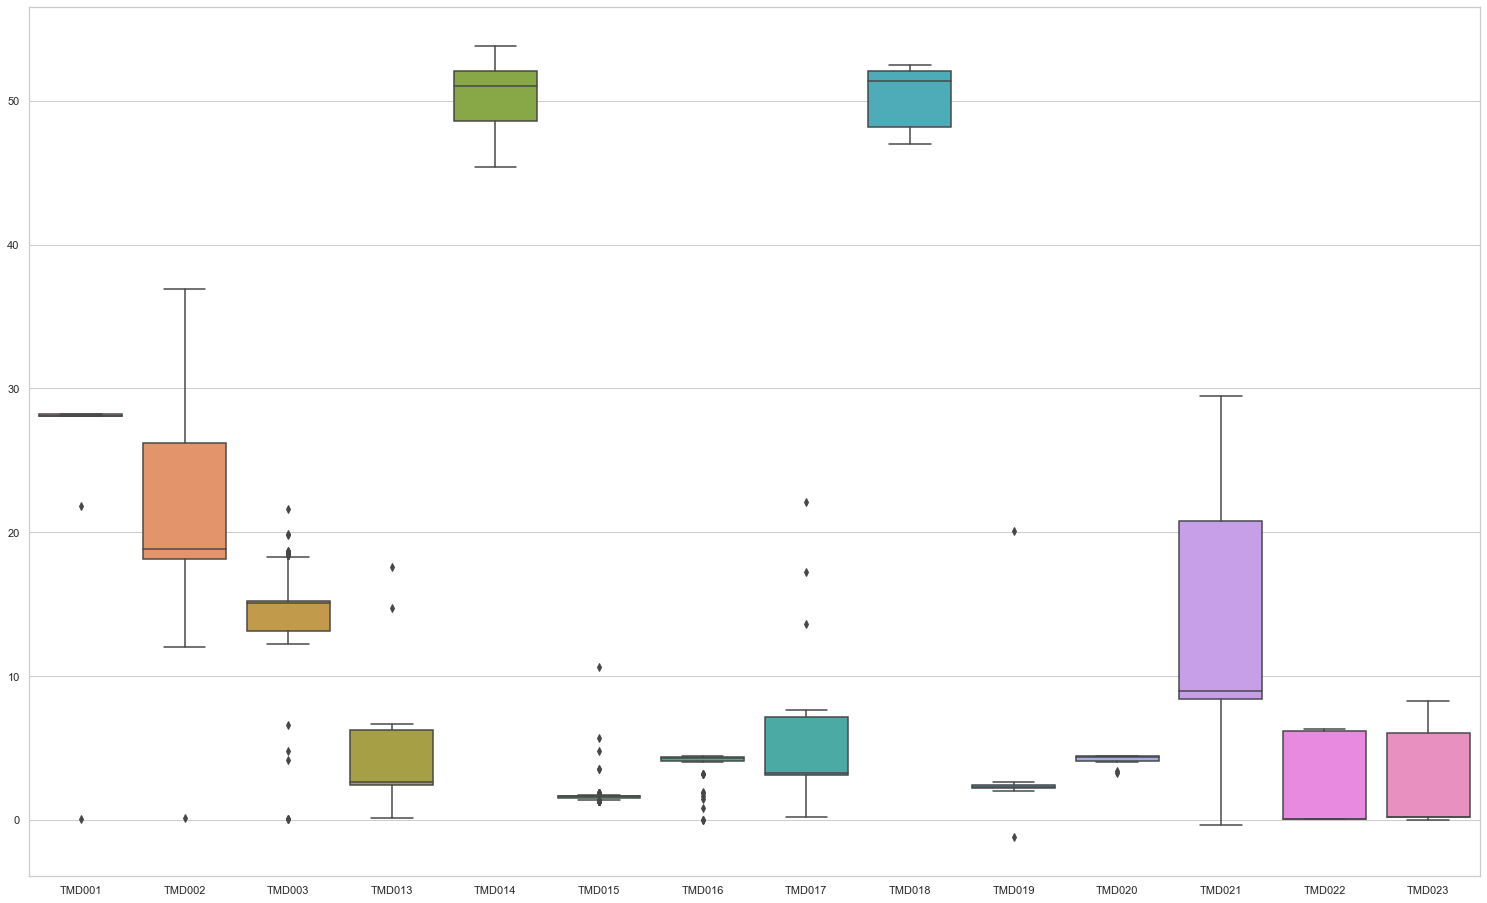

In [138]:
# Boxplot
plt.figure(figsize=(26, 16))
sns.boxplot(data=rawData)

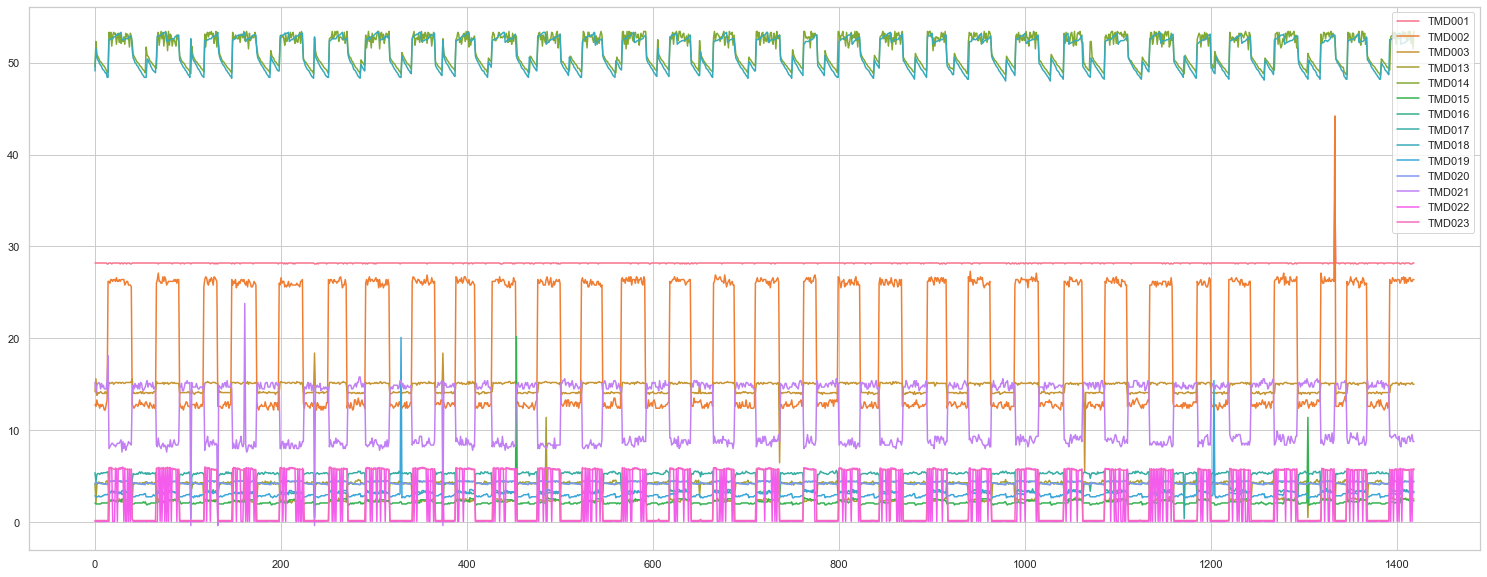

In [136]:
rawData2 = pd.read_csv('rawData/CBERS1/01jan2003_a_31jan2003_vi.csv')
rawData2 = rawData2[ ["OBTIME", "TMD001", "TMD002", "TMD003", "TMD013", "TMD014", "TMD015", "TMD016", "TMD017", "TMD018", "TMD019", "TMD020", "TMD021", "TMD022", "TMD023"] ]
rawData2 = rawData2.drop(columns=['OBTIME'])
plt.figure(figsize=(26, 10))
sns.lineplot(data=rawData2, dashes=False)

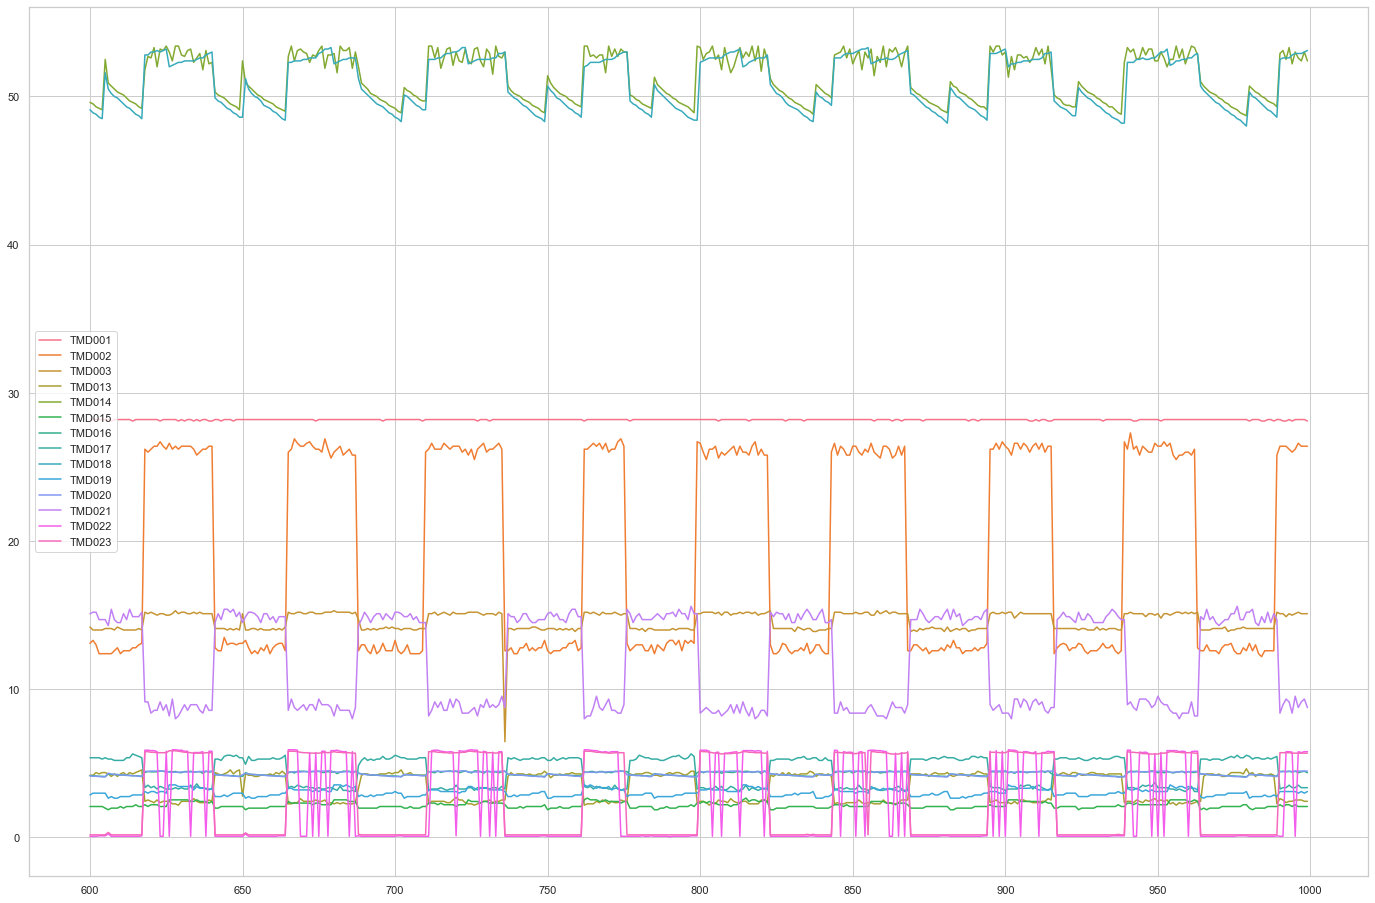

In [137]:
plt.figure(figsize=(24, 16))
sns.lineplot(data=rawData2[600:1000], dashes=False)

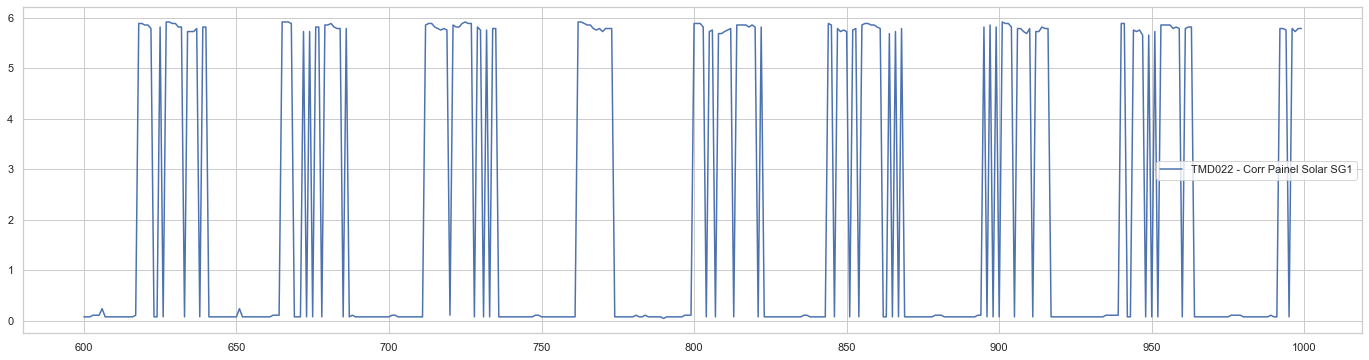

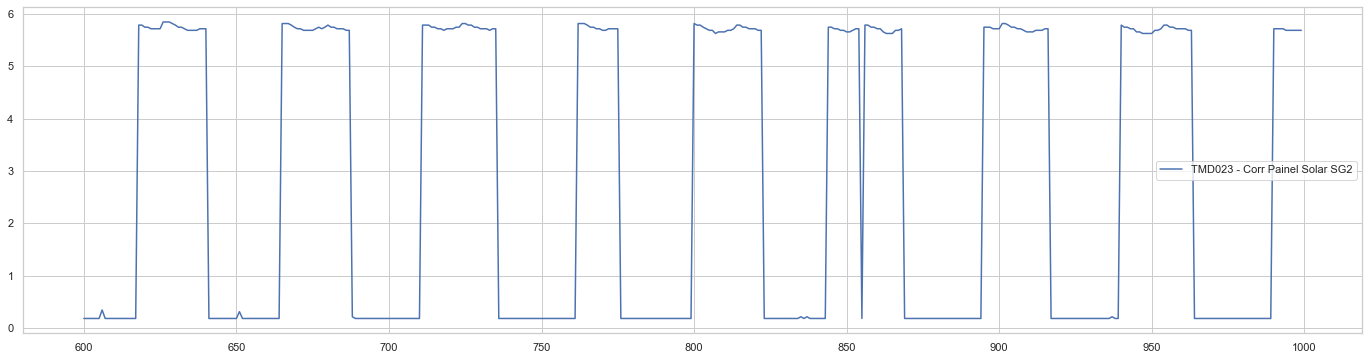

In [158]:
plt.figure(figsize=(24, 6))
sns.lineplot(data=rawData2[ 600:1000:1]["TMD022"], dashes=False, label = "TMD022 - Corr Painel Solar SG1")
plt.figure(figsize=(24, 6))
sns.lineplot(data=rawData2[ 600:1000:1]["TMD023"], dashes=False, label = "TMD023 - Corr Painel Solar SG2")

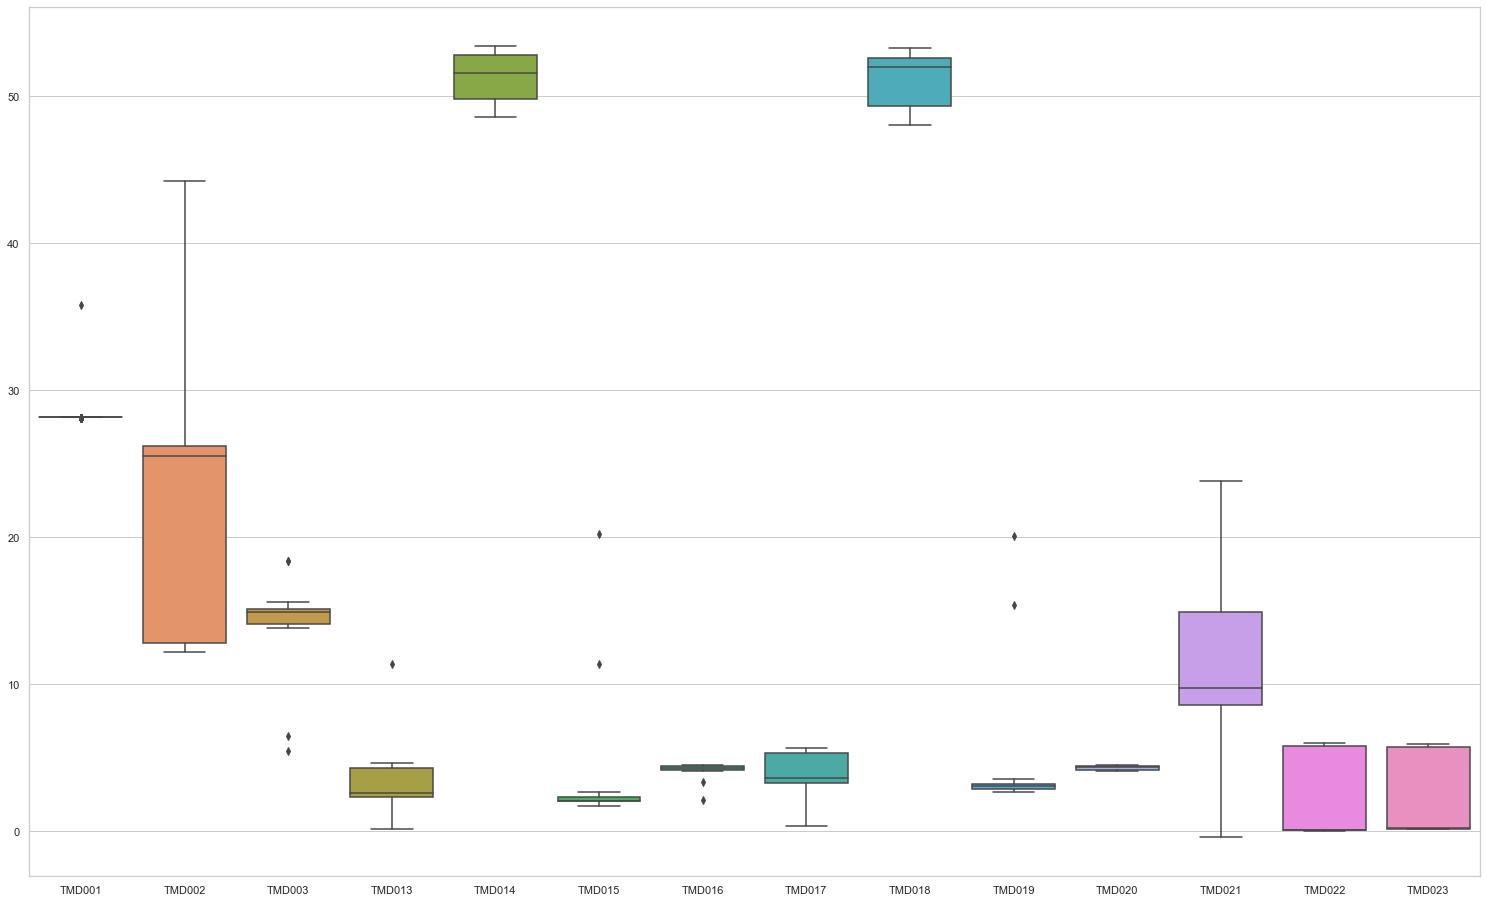

In [139]:
# Boxplot
plt.figure(figsize=(26, 16))
sns.boxplot(data=rawData2)

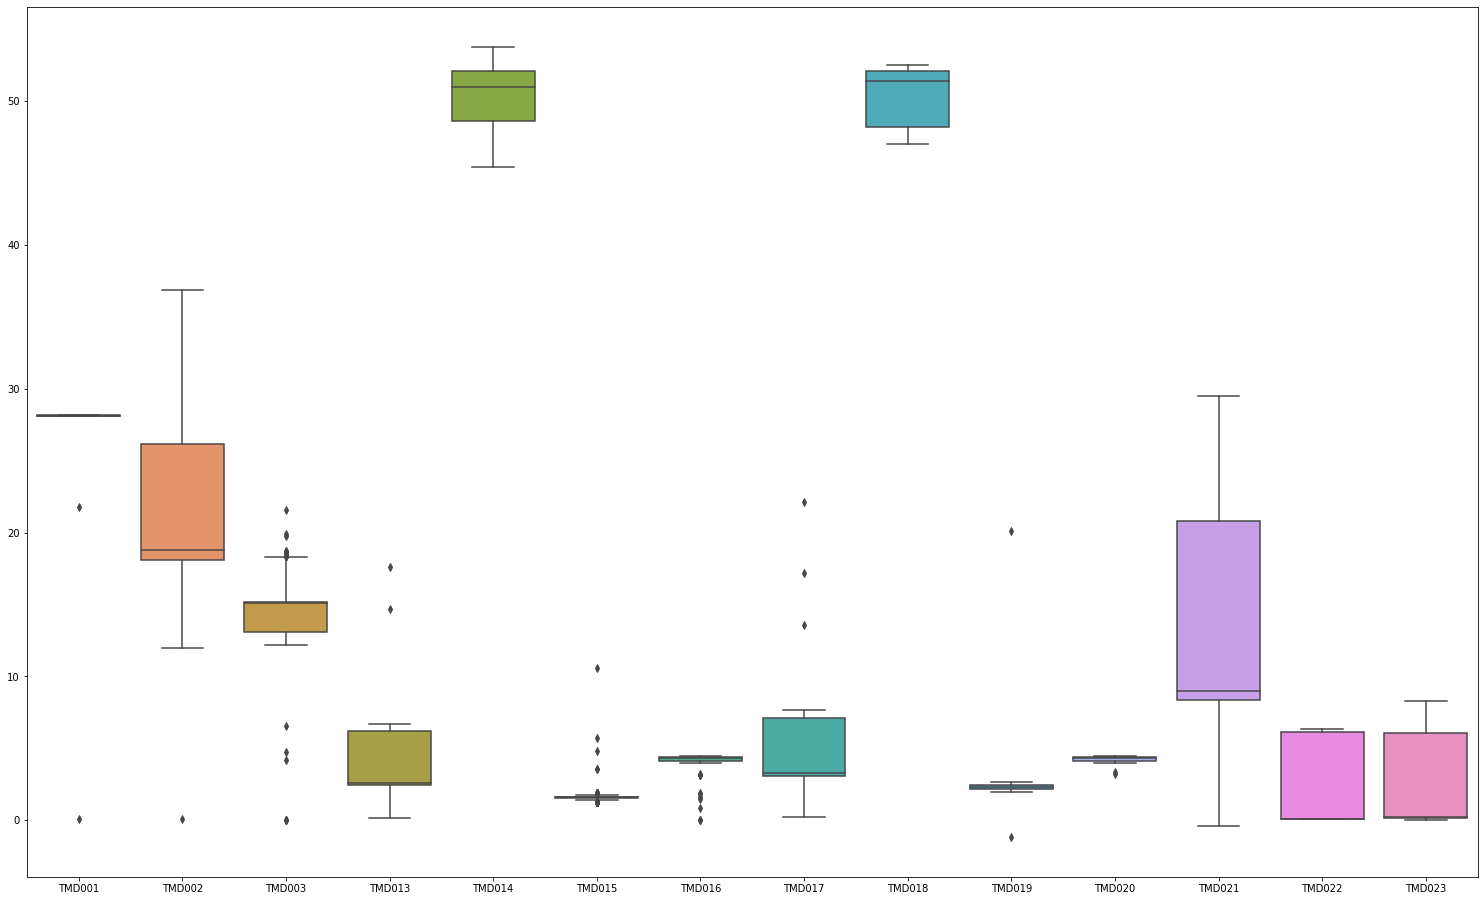

A fim de uma melhor analize de cada telemetria 

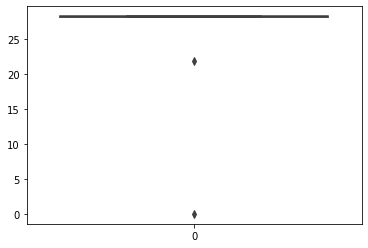

In [30]:
sns.boxplot(data=rawData['TMD001'])